<a href="https://colab.research.google.com/github/MiguelG26/Learning/blob/master/Hands-On%20Machine%20Learning%20with%20Scikit-Learn%20and%20TensorFlow2/09_unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/09_unsupervised_learning.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

# Setup

In [1]:
import pandas as pd #

import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import date

import plotly
# Import the necessaries libraries to work offline
import plotly.offline as pyo
# Set notebook mode to work in offline
pyo.init_notebook_mode()

from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State
import dash

plotly.__version__

'4.8.2'

In [2]:
# Common imports
import os
import urllib
import numpy as np
#from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from matplotlib.image import imread
from sklearn.preprocessing import MinMaxScaler
#from tensorflow.keras.preprocessing import image
from skimage.transform import resize

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "assets")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### Using clustering for image segmentation

In [ ]:
#link='https://www.soundandrecording.de/wp-content/uploads/2018/06/Mixpraxis-The-Beatles-RS23_05_Gatefold.jpg'
link="https://raw.githubusercontent.com/ageron/handson-ml2/master/images/unsupervised_learning/ladybug.png"

filename = link[link.rfind("/")+1:]
urllib.request.urlretrieve(link, os.path.join(IMAGES_PATH, filename))

In [ ]:
scaler = MinMaxScaler()
#to upload the image as np.array to get its height & lenght
#image0=IMAGES_PATH+"/ando.jpg" #for local images
#my_image0 = imread(image0) #for local images
my_image0 = imread(os.path.join(IMAGES_PATH, filename)) #for internet images

height=400
divider=my_image0.shape[0]/height
lenght=int(round(my_image0.shape[1]/divider,0))

#resize image
my_image = resize(my_image0, (400, lenght))

#to reshape the image from 3D to 2D & to scale values between 0 & 1
X = my_image.reshape(-1, 3)
X = scaler.fit_transform(X.astype(np.float64))

In [ ]:
segmented_imgs = []
n_colors = (3, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X) #train kmeans
    segmented_img = kmeans.cluster_centers_[kmeans.labels_] #to segment the images
    segmented_imgs.append(segmented_img.reshape(my_image.shape)) #to append segmented images to the list of images & reshape the image from 2D back to to 3D

plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(my_image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')
#to save the image as .jpg
save_fig('image_segmentation_diagram', tight_layout=True)

plt.show()

In [3]:
def create_segmented_image(link):
    ############################
        #to download the image
    ############################
    link=link

    filename = link[link.rfind("/")+1:]
    urllib.request.urlretrieve(link, os.path.join(IMAGES_PATH, filename))

    ############################
        #to preprocess the image
    ############################
    scaler = MinMaxScaler()
    #to upload the image as np.array to get its height & lenght
    #image0=IMAGES_PATH+"/ando.jpg" #for local images
    #my_image0 = imread(image0) #for local images
    my_image0 = imread(os.path.join(IMAGES_PATH, filename)) #for internet images

    height=400
    divider=my_image0.shape[0]/height
    lenght=int(round(my_image0.shape[1]/divider,0))

    #resize image
    my_image = resize(my_image0, (400, lenght))

    #to reshape the image from 3D to 2D & to scale values between 0 & 1
    X = my_image.reshape(-1, 3)
    X = scaler.fit_transform(X.astype(np.float64))

    ############################
        #to generate the segmented images
    ############################
    segmented_imgs = []
    n_colors = (3, 2)
    for n_clusters in n_colors:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X) #train kmeans
        segmented_img = kmeans.cluster_centers_[kmeans.labels_] #to segment the images
        segmented_imgs.append(segmented_img.reshape(my_image.shape)) #to append segmented images to the list of images & reshape the image from 2D back to to 3D

    plt.figure(figsize=(20,10))
    plt.subplots_adjust(wspace=0.05, hspace=0.1)

    plt.subplot(231)
    plt.imshow(my_image)
    plt.title("Original image")
    plt.axis('off')

    for idx, n_clusters in enumerate(n_colors):
        plt.subplot(232 + idx)
        plt.imshow(segmented_imgs[idx])
        plt.title("{} colors".format(n_clusters))
        plt.axis('off')
    #to save the image as .jpg
    save_fig('image_segmentation_diagram', tight_layout=True)
    
    return None

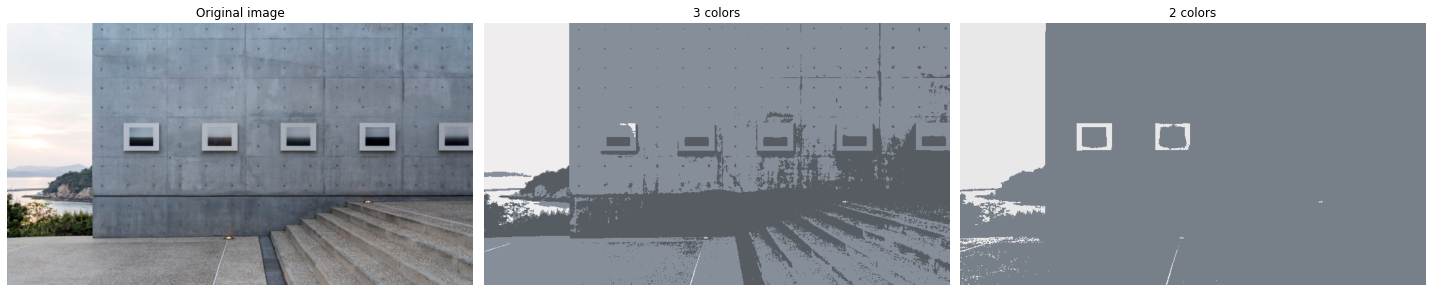

In [7]:
online_link="https://raw.githubusercontent.com/ageron/handson-ml2/master/images/unsupervised_learning/ladybug.png"
online_link="https://raw.githubusercontent.com/MiguelG26/Learning/master/handson-ml2/images/unsupervised_learning/ando.jpg"
#online_link='https://www.soundandrecording.de/wp-content/uploads/2018/06/Mixpraxis-The-Beatles-RS23_05_Gatefold.jpg'

app = JupyterDash(__name__)
app.layout = html.Div([
    html.H2("Image Segmentation with KMeans clustering",style= {'color':'#808080','font-weight':"bold"}),
    html.Div([
        html.Div([
            html.H5('Introduce Link:', 
                  style= {'color':'#808080','font-weight':"bold",'width': '33%', 'display': 'inline-block'}),
            dcc.Input(id="input", type="text", placeholder="enter a link to a picture",value=online_link),
        ],style= {'width': '100%', 'display': 'inline-block'}),
    ], style={
        'borderBottom': 'thin lightgrey solid',
        'backgroundColor': 'rgb(250, 250, 250)',
        'padding': '0px 5px'
    }),
    html.Br(),
    html.H3("Image1:",style= {'color':'#808080','font-weight':"bold"}),
    html.Div(html.Img(src=app.get_asset_url("image_segmentation_diagram.png"),className="risk-reward")),
    html.H3("Image2:",style= {'color':'#808080','font-weight':"bold"}),
    html.Div(html.Img(id='image',className="risk-reward")),
])


@app.callback(
    Output('image', 'src'),
    [Input('input', 'value')])
def Chart1(link):
    create_segmented_image(link)
    src=app.get_asset_url("image_segmentation_diagram.png")
    #src=("assets/image_segmentation_diagram.png"),
    return src
 
app.run_server(mode='inline', port=8081)

In [ ]:
link='https://www.soundandrecording.de/wp-content/uploads/2018/06/Mixpraxis-The-Beatles-RS23_05_Gatefold.jpg'
link="https://raw.githubusercontent.com/ageron/handson-ml2/master/images/unsupervised_learning/ladybug.png"
create_segmented_image(link)


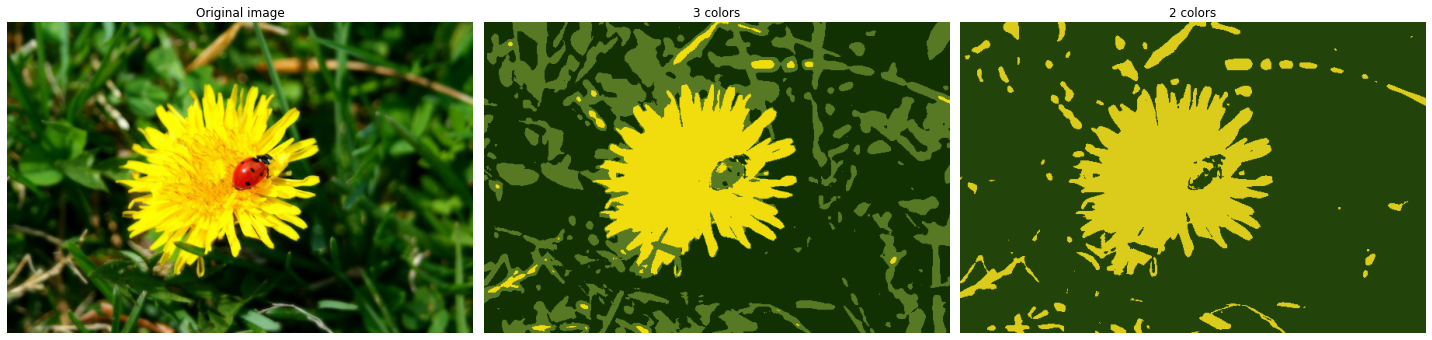

In [9]:
import flask

online_link="https://raw.githubusercontent.com/ageron/handson-ml2/master/images/unsupervised_learning/ladybug.png"
#online_link='https://www.soundandrecording.de/wp-content/uploads/2018/06/Mixpraxis-The-Beatles-RS23_05_Gatefold.jpg'

static_image_route = '/static/'

app = JupyterDash(__name__)
app.layout = html.Div([
    html.H2("Image Segmentation with KMeans clustering",style= {'color':'#808080','font-weight':"bold"}),
    html.Div([
        html.Div([
            html.H5('Introduce Link:', 
                  style= {'color':'#808080','font-weight':"bold",'width': '33%', 'display': 'inline-block'}),
            dcc.Input(id="input", type="text", placeholder="enter a link to a picture",value=online_link),
        ],style= {'width': '100%', 'display': 'inline-block'}),
    ], style={
        'borderBottom': 'thin lightgrey solid',
        'backgroundColor': 'rgb(250, 250, 250)',
        'padding': '0px 5px'
    }),
    html.Br(),
    html.H3("Image1:",style= {'color':'#808080','font-weight':"bold"}),
    html.Div(html.Img(
       id='image',
       #src=("assets/image_segmentation_diagram.png"),
       className="risk-reward")),
])


@app.callback(
    Output('image', 'src'),
    [Input('input', 'value')])
def update_src(link):
    create_segmented_image(link)
    #src=app.get_asset_url("image_segmentation_diagram.png")
    #src=("assets/image_segmentation_diagram.png"),
    #return src
    return static_image_route + 'image_segmentation_diagram.png'

@app.server.route('{}<image_path>.png'.format(static_image_route))
def serve_image(image_path):
    image_name = '{}.png'.format(image_path)
    return flask.send_from_directory(IMAGES_PATH, image_name)

app.run_server(mode='inline', port=8082)

In [ ]:
import base64

#online_link="https://raw.githubusercontent.com/ageron/handson-ml2/master/images/unsupervised_learning/ladybug.png"
online_link='https://www.soundandrecording.de/wp-content/uploads/2018/06/Mixpraxis-The-Beatles-RS23_05_Gatefold.jpg'

image_filename = "image_segmentation_diagram.png" # replace with your own image
encoded_image = base64.b64encode(open(image_filename, 'rb').read())


app = JupyterDash(__name__)
app.layout = html.Div([
    html.H2("Image Segmentation with KMeans clustering",style= {'color':'#808080','font-weight':"bold"}),
    html.Div([
        html.Div([
            html.H5('Select places:', 
                  style= {'color':'#808080','font-weight':"bold",'width': '33%', 'display': 'inline-block'}),
            dcc.Checklist(
                id='Checklist',
                options=[
                    {'label': '1st', 'value': '1'},
                    {'label': '2nd', 'value': '2'},
                    {'label': '3rd', 'value': '3'},
                ],
                value=['1','2','3'],
                labelStyle = dict(display='inline-block', color='#808080'),
                style= {'width': '66%', 'display': 'inline-block'}
            ),
        ],style= {'width': '49%', 'display': 'inline-block'}),
        html.Div([
            html.H6('Observations:', 
                  style= {'color':'#808080','font-weight':"bold", 'width': '33%', 'display': 'inline-block'}),
            html.Div([
                dcc.RadioItems(
                    id='RadioItems',
                    options=[
                        {'label': '10', 'value': 10},
                        {'label': '20', 'value': 20},
                    ],
                    value=10,
                    labelStyle = dict(display='inline-block', color='#808080'),
                    style= {'display': 'inline-block'}
                ),
            ],style= {'width': '49%', 'display': 'inline-block',}),###################
        ],style= {'width': '49%', 'display': 'inline-block'}),
    ], style={
        'borderBottom': 'thin lightgrey solid',
        'backgroundColor': 'rgb(250, 250, 250)',
        'padding': '0px 5px'
    }),
    dcc.Input(id="input", type="text", placeholder="enter a link to a picture",value=online_link),
    html.Br(),
    html.Div(html.Img(src='data:image/png;base64,{}'.format(encoded_image),className="risk-reward")),
])
 
app.run_server(mode='inline', port=8083)